In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split



from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
color=['#9a8c98','#4a4e69']

In [4]:
df = pd.read_csv('data/Main Sample.csv')

### Check NaN

In [5]:
df.isna().any().any()

False

In [6]:
df.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          9980 non-null   int64  
 1   CreditScore         9980 non-null   int64  
 2   Location            9980 non-null   object 
 3   Gender              9980 non-null   object 
 4   Age                 9980 non-null   int64  
 5   Tenure              9980 non-null   int64  
 6   Balance             9980 non-null   float64
 7   NumOfProducts       9980 non-null   int64  
 8   HasCreditCard       9980 non-null   int64  
 9   IsActiveMember      9980 non-null   int64  
 10  EstimatedSalary     9980 non-null   float64
 11  Exited              9980 non-null   int64  
 12  Complain            9980 non-null   int64  
 13  Satisfaction Score  9980 non-null   int64  
 14  Card Type           9980 non-null   object 
 15  Point Earned        9980 non-null   int64  
dtypes: flo

In [8]:
df.shape

(9980, 16)

# Q1
### What is the proportion of the customers that are still using the banking services compared to those that have left in the period covered in the dataset? Is there a significant difference in the proportion that the bank authority should be worried about?

In [9]:
df['Exited'].mean()

0.2035070140280561

In [10]:
total_customers = df.shape[0]
print(f"Total customers: {total_customers}")


Total customers: 9980


In [11]:
active_customers = df[df['Exited'] == 0].shape[0]
prop_active = active_customers / total_customers

print(f"Active customers: {active_customers} ({prop_active:.2%})")


Active customers: 7949 (79.65%)


In [12]:
exited_customers = df[df['Exited'] == 1].shape[0]
prop_exited  = exited_customers / total_customers

print(f"Exited customers: {exited_customers} ({prop_exited :.2%})")


Exited customers: 2031 (20.35%)


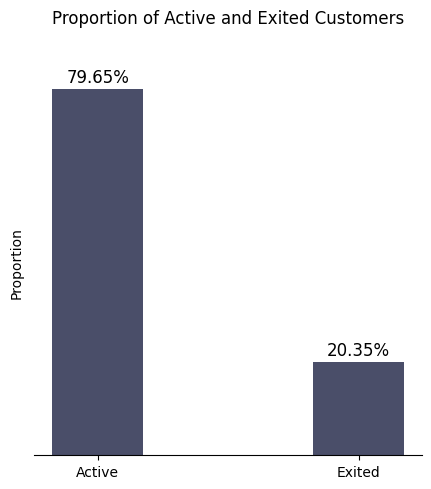

In [13]:
import matplotlib.pyplot as plt
import numpy as np



prop_active = 0.7965
prop_exited = 0.2035


labels = ['Active', 'Exited']
proportions = [prop_active, prop_exited]
#confidence_intervals = [[conf_int_lower, conf_int_upper], [0, 0]]  # For error bars, only the difference in proportions is used

# Plotting
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(5,5))

bars = ax.bar(x, proportions, width, label='Proportion',color='#4a4e69')



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.set_yticklabels([])
ax.set_yticks([])

ax.set_ylabel('Proportion')
ax.set_title('Proportion of Active and Exited Customers', y=1.1)
ax.set_xticks(x)
ax.set_xticklabels(labels)


for bar in bars.patches:
    ax.annotate(
        f'{bar.get_height()*100:.2f}%',
        xy = (bar.get_x() + bar.get_width()/2, bar.get_height()),
        ha='center',
        va='center',
        size=12,
        xytext=(0, 8),
        textcoords='offset points'
        
        
    )
    


ax.legend().set_visible(False)


plt.savefig('Pics/prop_act_exit.png',bbox_inches='tight')

plt.show()


pooled proportion:

$$p = \frac{x_1 + x_2}{n_1 + n_2}$$


$x_1$ and $x_2$ are the number of "successes" in each of the two groups, and $n_1$ and $n_2$ are the total number of observations in each of the two groups.


In [14]:
pooled_prop = (active_customers + exited_customers)/(total_customers * 2)
print(f'Pooled proportion: {pooled_prop}')

Pooled proportion: 0.5


z score:

$$ z = \frac{{p_1 - p_2}}{{\sqrt{\frac{{p(1 - p)}}{{\left(\frac{1}{{n_1}} + \frac{1}{{n_2}}\right)}}}}} $$



In [15]:


# standard error
SE = np.sqrt(pooled_prop * (1 - pooled_prop) * (1 / active_customers + 1 / exited_customers))

# Z-score
z_score = (prop_active - prop_exited) / SE

print(f'Z score: {z_score}')


Z score: 47.70134542634376


In [16]:
from scipy.stats import norm

alpha = 0.05
upper = norm.ppf(1 - alpha/2)  
lower = -norm.ppf(1 - alpha/2)  

print('Critical values: ',(upper, lower))


Critical values:  (1.959963984540054, -1.959963984540054)


In [17]:
(z_score,upper,lower)

(47.70134542634376, 1.959963984540054, -1.959963984540054)

In [18]:
def get_ci(z_score, upper, lower):
    CI = 0
    if (z_score < lower):
        CI = lower
        title = 'Reject $H_0$'
    
    elif z_score > upper:
        
        CI = upper
        title = 'Reject $H_0$'
        
    else:
        title = 'Accept $H_0$'
        
    return CI, title
    
    
CI, title = get_ci(z_score,upper,lower)

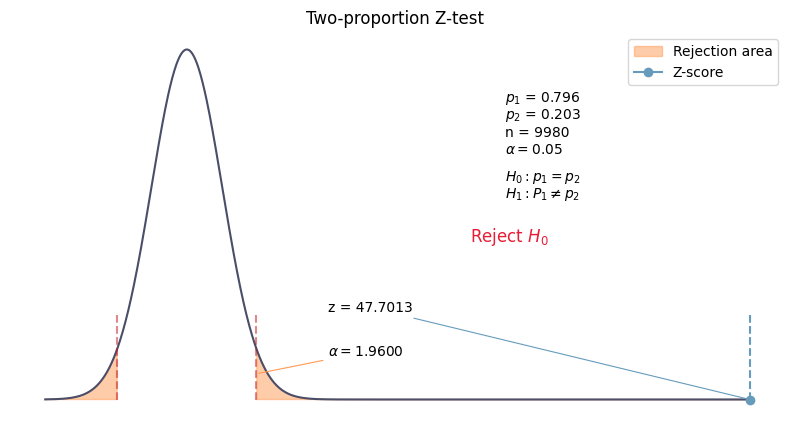

In [19]:
x = np.linspace(- 4, z_score/3 , 1000)
y = stats.norm.pdf(x, loc=0, scale=1)   
    
fig, ax = plt.subplots(figsize=(10,5))
ax.axis(False)
ax.set_title('Two-proportion Z-test ')   
ax.plot(x,y,color='#4a4e69', alpha = 1)
ax.fill_between(x,y, where=(x < lower)|(x > upper),color='#ff9b54', alpha=0.5, label='Rejection area')
ax.vlines(z_score/3, 0, 0.10,linestyle='--', color='#669bbc')
ax.plot(z_score/3, 0, marker='o', color='#669bbc',label='Z-score')
    
for coord in [lower, upper]:
    ax.vlines(coord, 0, 0.10,linestyle='--',color='#c1121f', alpha = 0.5)
    
    

ax.annotate('z = '+f'{z_score:.04f}', xy =(z_score/3, 0),
                    xytext =(4, 0.10), 
                    arrowprops = dict(
                        arrowstyle='-',
                        color ='#669bbc',
                        lw=0.8
                                     )
               )

    
ax.annotate(f'$\\alpha={CI:0.4f}$', xy =(CI, stats.norm.pdf(CI)/2),
                    xytext =(4, 0.05), 
                    arrowprops = dict(
                        arrowstyle="-",
                        color='#ff9b54',
                        lw=0.8
                                     )
               )

    
    
# hypothesis text
ax.text(9, 0.34, r'$p_1$'+f' = {prop_active:.3f}')
ax.text(9, 0.32, r'$p_2$'+f' = {prop_exited:.3f}')
ax.text(9, 0.30, f'n = {total_customers}')
ax.text(9, 0.28, f'$\\alpha = {alpha}$')

ax.text(9, 0.25, f'$H_0: p_1 = p_2$')
ax.text(9, 0.23, f'$H_1: P_1 \\neq p_2$')


ax.text(8, 0.18, title, color='#e71d36',fontsize=12)
  
ax.legend()

plt.savefig('Pics/two_prop_ztest.png',bbox_inches='tight')
plt.show()
        

# Q2
### What is the relationship between the number of complaints received by the bank authorities and the number of exited customers?

In [20]:
exited_complaints = df[df['Exited'] == 1]['Complain'].mean()
remaining_complaints = df[df['Exited'] == 0]['Complain'].mean()

In [21]:
exited_complaints 

0.9980305268340719

In [22]:
remaining_complaints

0.001258019876714052

In [23]:
cross_tab = pd.crosstab(df['Complain'], df['Exited'])
cross_tab

Exited,0,1
Complain,,
0,7939,4
1,10,2027


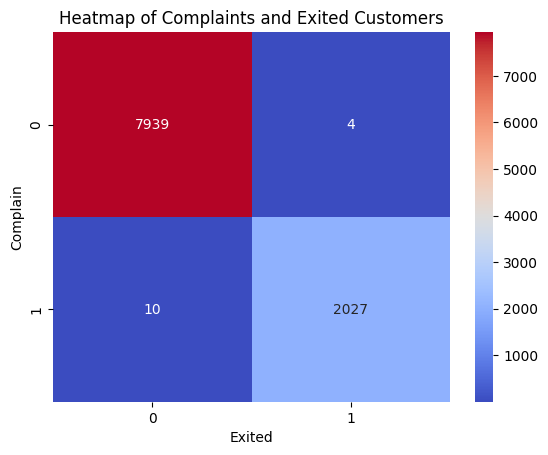

In [24]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.xlabel("Exited")
plt.ylabel("Complain")
plt.title("Heatmap of Complaints and Exited Customers")
plt.show()

In [25]:
from scipy.stats import chi2_contingency

# create a contingency table
contingency_table = df.groupby(['Complain', 'Exited']).size().unstack()

# perform chi-square test of independence
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2_stat}')
print(f'p-value: {p}')


Chi-square statistic: 9887.809544958589
p-value: 0.0


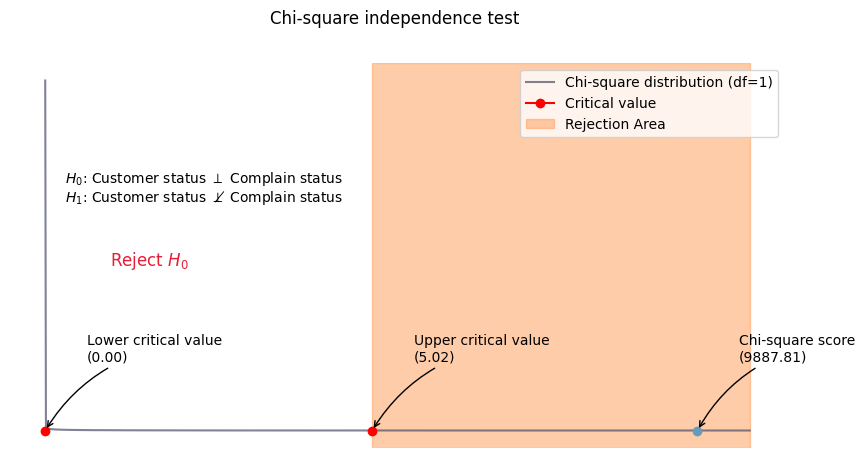

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df_chi2 = 1
x = np.linspace(stats.chi2.ppf(0.001, df_chi2), stats.chi2.ppf(0.999, df_chi2), 1000)
y = stats.chi2.pdf(x, df_chi2)

lower_critical = stats.chi2.ppf(0.025, df_chi2)
upper_critical = stats.chi2.ppf(0.975, df_chi2)

fig, ax = plt.subplots(figsize=(10,5))
ax.axis(False)

ax.plot(x, y, label=f'Chi-square distribution (df={df_chi2})', color='#4a4e69', alpha=0.7)

ax.plot(lower_critical, 0, c='r', marker='o', label=f'Critical value')
ax.plot(upper_critical, 0, c='r', marker='o')
ax.plot(upper_critical+5, 0, c='#669bbc', marker='o')



ax.text(0.25, 0.7, r'$H_0$: Customer status $\perp$ Complain status',
        horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes, fontsize=10)

ax.text(0.25, 0.65, r'$H_1$: Customer status $\perp$$\not$ Complain status',
        horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes, fontsize=10)


ax.text(1, 150, 'Reject $H_0$', color='#e71d36',fontsize=12)

# Annotation for lower critical value
ax.annotate(f'Lower critical value\n({lower_critical:.2f})',
            xy=(lower_critical, 0), xycoords='data',
            xytext=(30, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Annotation for upper critical value
ax.annotate(f'Upper critical value\n({upper_critical:.2f})',
            xy=(upper_critical, 0), xycoords='data',
            xytext=(30, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

ax.annotate(f'Chi-square score\n({chi2_stat:.2f})',
            xy=(upper_critical+5, 0), xycoords='data',
            xytext=(30, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Mark rejection area
ax.axvspan(upper_critical, x[-1], color='#ff9b54', alpha=0.5, label='Rejection Area')


ax.set_xlabel('Chi-square Statistic')
ax.set_ylabel('Probability Density Function')
ax.set_title('Chi-square independence test ',y=1.08)
ax.legend()

plt.savefig('Pics/chi2_test.png',bbox_inches='tight')
plt.show()


### Formula for the chi-square statistic


$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$

$O_i$ - represents the observed frequencies (i.e., the actual data you collected),

$E_i$ - represents the expected frequencies (i.e., the frequencies you would expect if the null hypothesis were true), and


In [27]:
cont = df.groupby(['Complain','Exited']).size().unstack()
cont_table = cont.copy()
cont

Exited,0,1
Complain,,
0,7939,4
1,10,2027


In [28]:
grand_total = cont.sum().sum()
grand_total

9980

In [29]:
column_sum = cont.sum(axis=1)
cont['Total']= column_sum
cont

Exited,0,1,Total
Complain,,,
0,7939,4,7943
1,10,2027,2037


### Contingency table 

In [30]:
row_sum = cont.sum(axis=0)
cont.loc['Total',:]= row_sum
cont

Exited,0,1,Total
Complain,,,
0,7939.0,4.0,7943.0
1,10.0,2027.0,2037.0
Total,7949.0,2031.0,9980.0


### Expected values table

In [31]:

exp_table =[[None]*2 for _ in range(2) ]

for i in cont.index[:-1]:
    for j in cont.columns[:-1]:
        val = row_sum[i] * column_sum[j]/grand_total
        exp_table[i][j] = val
    
    
exp_table = pd.DataFrame(exp_table)
exp_table

,0,1
0,6326.543788,1622.456212
1,1616.456212,414.543788


### scipy.stats Expected values table

In [32]:
expected

array([[6326.54378758, 1616.45621242],
       [1622.45621242,  414.54378758]])

### Difference table

In [33]:
diff_table = cont_table - exp_table
diff_table

Exited,0,1
Complain,,
0,1612.456212,-1618.456212
1,-1606.456212,1612.456212


### Squared Difference

In [34]:
diff_2 = diff_table**2
diff_2

Exited,0,1
Complain,,
0,2.600015e+06,2.619401e+06
1,2.580702e+06,2.600015e+06


### Divide by Expected

In [35]:
diff_3 = diff_2 / exp_table
diff_3

Exited,0,1
Complain,,
0,410.969263,1614.466074
1,1596.518076,6271.991319


### get  test statistic

In [36]:
chi_2_score = diff_3.sum().sum()
chi_2_score

9893.944731978527

# Q3.
### What are the characteristics and statistics (in terms of gender, age groups, and tenure etc,) of the customers that are more likely to complain? Provide an informative profile description of those type of customers.

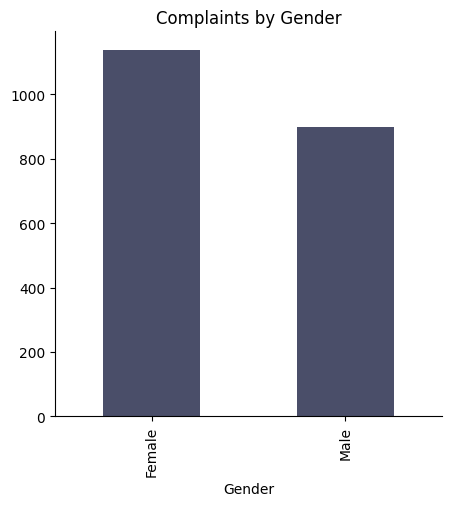

In [37]:
fig, ax = plt.subplots(figsize=(5,5))
df[df['Complain'] == 1].groupby('Gender').size().plot(kind='bar',color=color[1],ax=ax)

ax.set_title('Complaints by Gender')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('Pics/compl_gender.png',bbox_inches='tight')

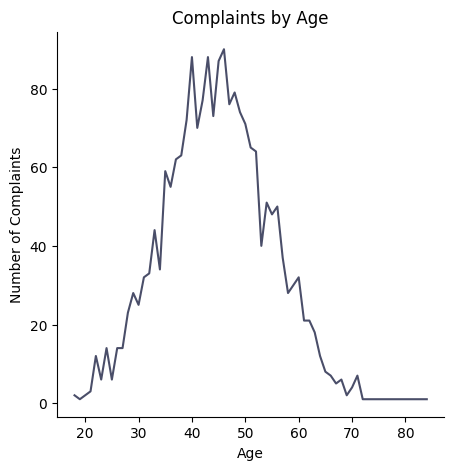

In [38]:
fig, ax = plt.subplots(figsize=(5,5))
df[df['Complain'] == 1].groupby(['Age']).size().plot(kind='line',color=color[1],ax=ax)

ax.set_title('Complaints by Age')
ax.set_ylabel("Number of Complaints")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('Pics/compl_age.png',bbox_inches='tight')

In [39]:
df[df['Complain'] == 1].groupby(['Tenure']).size()

Tenure
0      95
1     233
2     200
3     211
4     204
5     210
6     198
7     175
8     195
9     214
10    102
dtype: int64

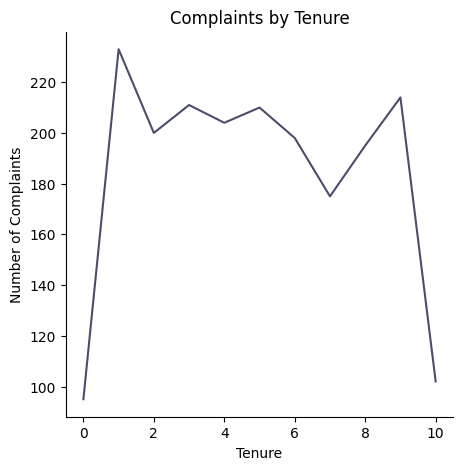

In [40]:
fig, ax = plt.subplots(figsize=(5,5))
df[df['Complain'] == 1].groupby(['Tenure']).size().plot(kind='line',color=color[1], ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Complaints by Tenure')
ax.set_ylabel("Number of Complaints")

plt.savefig('Pics/compl_tenure.png',bbox_inches='tight')


<AxesSubplot: xlabel='Age'>

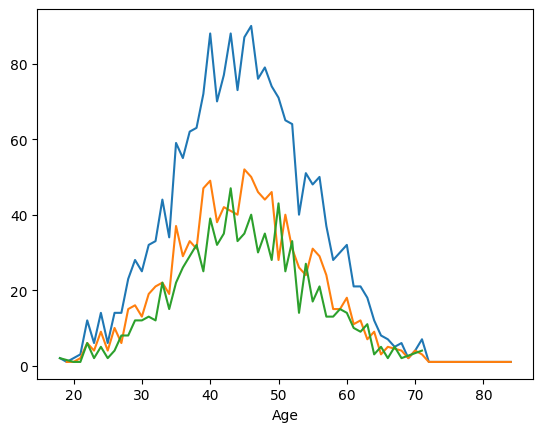

In [41]:
fig , ax = plt.subplots()

df[df['Complain'] == 1].groupby(['Age']).size().plot(kind='line',ax=ax)
df[(df['Complain'] == 1)&(df['Gender']=='Female')].groupby(['Age']).size().plot(kind='line',ax =ax)
df[(df['Complain'] == 1)&(df['Gender']=='Male')].groupby(['Age']).size().plot(kind='line',ax =ax)

In [42]:
df[df['Complain'] == 1].groupby('Location').size()

Location
France     809
Germany    817
Spain      411
dtype: int64

In [43]:
df['EstimatedSalary'].describe()

count      9980.000000
mean     100092.332323
std       57508.764007
min          11.580000
25%       51014.837500
50%      100168.240000
75%      149400.107500
max      199992.480000
Name: EstimatedSalary, dtype: float64

### Create income groups based on quartiles

In [44]:

df['IncomeGroup'] = pd.cut(df['EstimatedSalary'],
                           bins=[0, 51014.8375, 100168.24, 149400.1075, df['EstimatedSalary'].max()],
                           labels=['Low', 'Medium_Low', 'Medium_High', 'High'])


In [45]:
df.groupby(['IncomeGroup','Complain']).size().unstack()

Complain,0,1
IncomeGroup,,
Low,1996,499
Medium_Low,2000,495
Medium_High,1990,505
High,1957,538


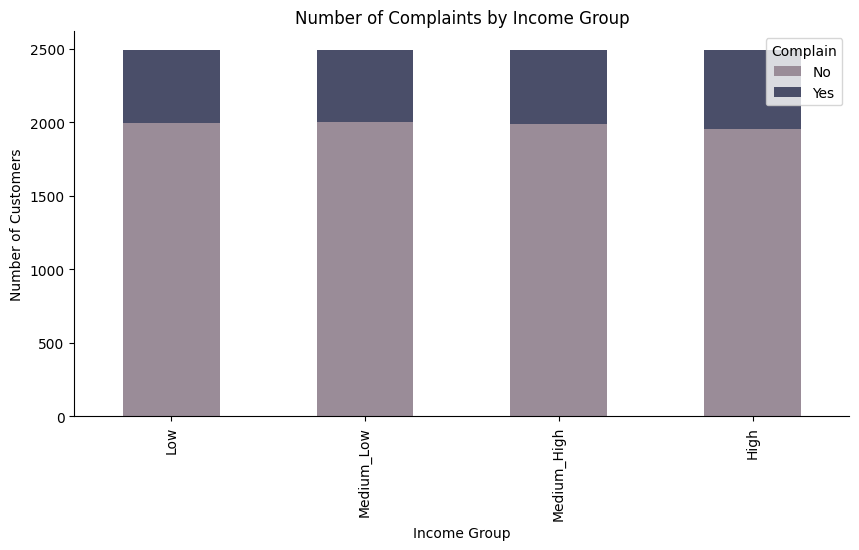

In [46]:
import matplotlib.pyplot as plt


complaint_data = df.groupby(['IncomeGroup','Complain']).size().unstack()

fig, ax = plt.subplots(figsize=(10,5))
complaint_data.plot(kind='bar', stacked=True, color=color, ax=ax)

ax.set_xlabel('Income Group')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Complaints by Income Group')
ax.legend(['No', 'Yes'], title='Complain', loc='upper right')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('Pics/compl_income.png',bbox_inches='tight')

plt.show()


In [47]:
df['Balance'].describe()

count      9980.000000
mean      76523.354960
std       62405.199941
min           0.000000
25%           0.000000
50%       97258.330000
75%      127660.767500
max      250898.090000
Name: Balance, dtype: float64

### Create balance groups

In [48]:
df['BalanceGroup'] = pd.cut(df['Balance'],
                            bins=[-1, 0, 100000, 130000, df['Balance'].max()],
                            labels=['Zero', 'Low', 'Medium', 'High'])

In [49]:
cross_tab_balance = df.groupby(['BalanceGroup','Complain']).size().unstack()
cross_tab_balance

Complain,0,1
BalanceGroup,,
Zero,3108,500
Low,1256,324
Medium,1839,672
High,1740,541


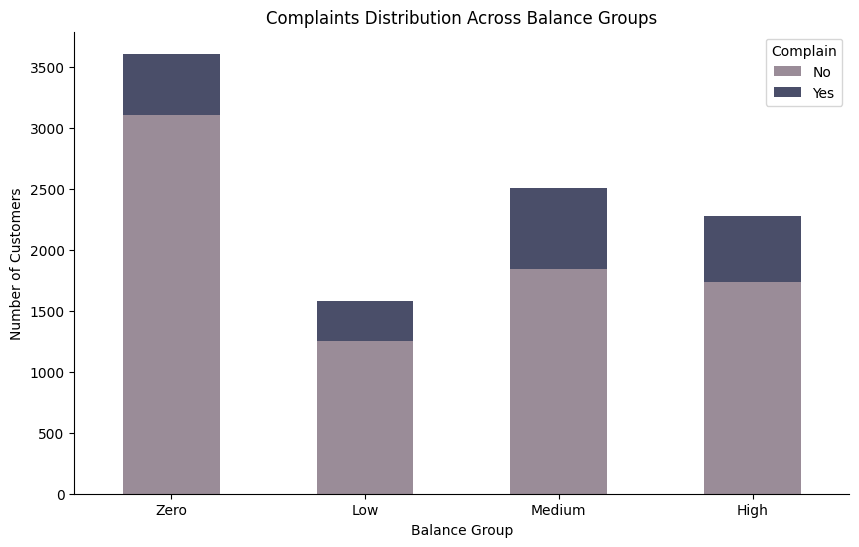

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
cross_tab_balance.plot(kind='bar', stacked=True, figsize=(10, 6), color=color, ax=ax)

ax.set_xlabel("Balance Group")
ax.set_ylabel("Number of Customers")
ax.set_title("Complaints Distribution Across Balance Groups")
ax.legend(['No', 'Yes'], title='Complain', loc='upper right')

plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('Pics/compl_balance.png',bbox_inches='tight')

plt.show()


In [51]:
# Calculate the proportions of complaints
proportions = cross_tab_balance.div(cross_tab_balance.sum(axis=1), axis=0)
proportions


Complain,0,1
BalanceGroup,,
Zero,0.861419,0.138581
Low,0.794937,0.205063
Medium,0.732378,0.267622
High,0.762823,0.237177


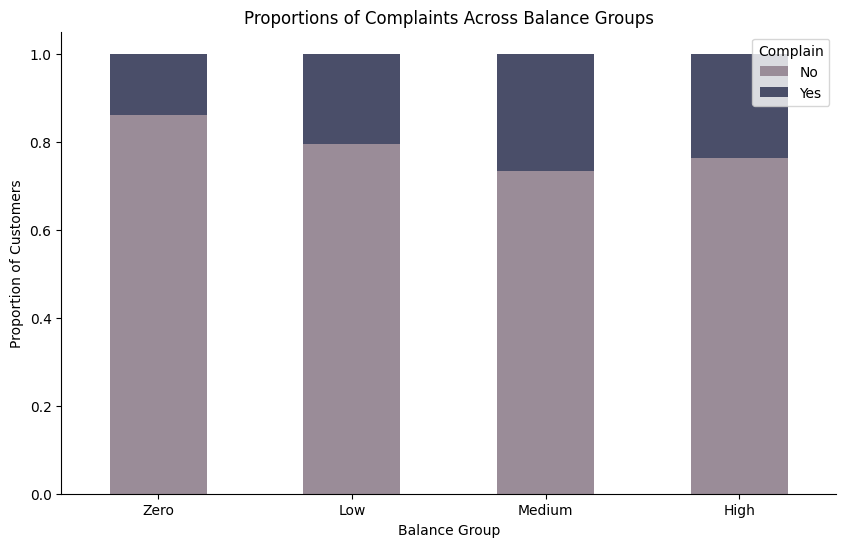

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=color, ax=ax)
ax.set_xlabel("Balance Group")
ax.set_ylabel("Proportion of Customers")
ax.set_title("Proportions of Complaints Across Balance Groups")
ax.legend(['No', 'Yes'], title='Complain', loc='upper right')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('Pics/compl_balance_prop.png',bbox_inches='tight')

plt.xticks(rotation=0)
plt.show()


# Q4
### Is there a significant difference between the credit scores of all the customers that have complained and those who have not in the period covered in the dataset?

In [53]:
complained = df[df['Complain'] == 1]['CreditScore']
not_complained = df[df['Complain'] == 0]['CreditScore']


In [54]:
complained.mean()

645.6602847324497

In [55]:
not_complained.mean()

651.8062444920056

### Normality test

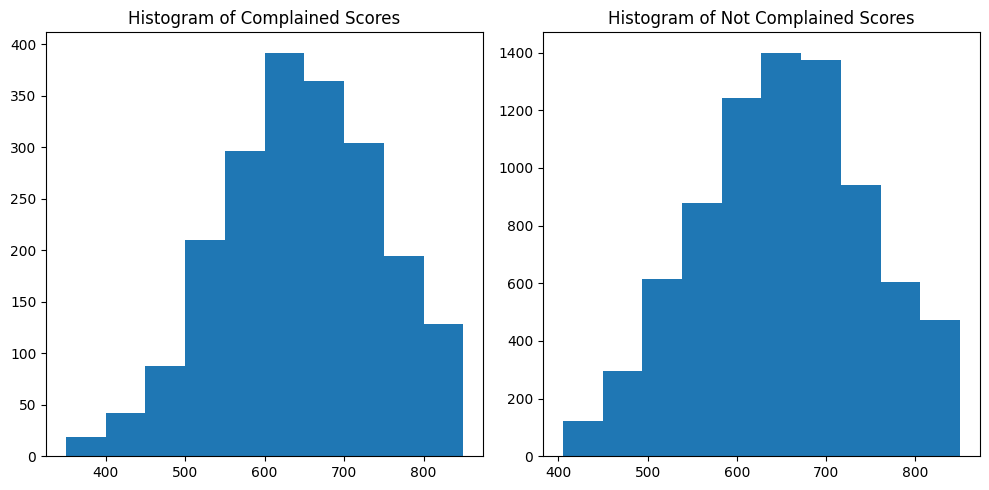

In [56]:
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, ax = plt.subplots(nrows=1,ncols=2 ,figsize=(10, 5))


ax[0].hist(complained)
ax[0].set_title('Histogram of Complained Scores')
ax[1].hist(not_complained)
ax[1].set_title('Histogram of Not Complained Scores')

plt.tight_layout()
plt.show()



In [57]:
t_stat, p_val = stats.ttest_ind(complained, not_complained)

print(f'T-statistic: {t_stat}')
print(f'p-value: {p_val}')


T-statistic: -2.5614564208056954
p-value: 0.010437996812274256


In [58]:
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference ")
else:
    print("Fail to reject the null hypothesis: There is no significant difference ")


Reject the null hypothesis: There is a significant difference 


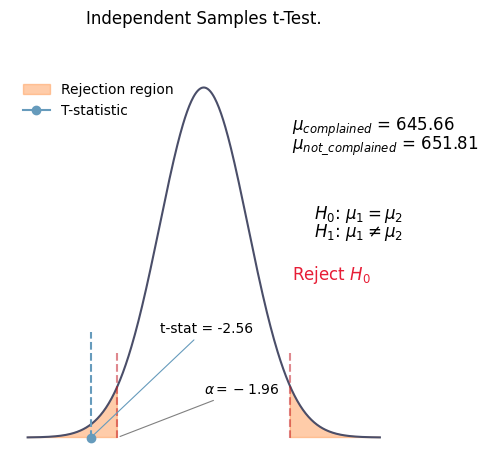

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


t_statistic = -2.561  
dfr = 9978 
upper = stats.t.ppf(1 - alpha / 2, dfr)
lower = stats.t.ppf(alpha / 2, dfr)

x = np.linspace(-4, 4, 500)


y = stats.t.pdf(x, dfr)


fig, ax = plt.subplots(figsize=(5, 5))
ax.axis(False)
ax.set_title('t-Distribution')


ax.plot(x, y, color='#4a4e69', alpha=1)

ax.fill_between(x, y, where=(x < lower) | (x > upper), color='#ff9b54', alpha=0.5, label='Rejection region')

# Plot the t-statistic
ax.vlines(t_statistic, 0, 0.12, linestyle='--', color='#669bbc')
ax.plot(t_statistic, 0, marker='o', color='#669bbc', label='T-statistic')

# Annotation for t-statistic
ax.annotate(f't-stat = {t_statistic:.02f}', xy=(t_statistic, 0), xytext=(-1, 0.12),
            arrowprops=dict(arrowstyle='-', color='#669bbc', lw=0.8))


ax.annotate(f'$\\alpha={lower:0.2f}$', xy =(lower, 0),
                    xytext =(0, 0.05), 
                    arrowprops = dict(
                        arrowstyle="-",
                        color='grey',
                        lw=0.8
                                     )
               )



ax.set_xlabel('$t$')
ax.set_ylabel('Density')


ax.set_title('Independent Samples t-Test.',y=1.1)


for coord in [lower, upper]:
    ax.vlines(coord, 0, 0.10,linestyle='--',color='#c1121f', alpha = 0.5)
    
ax.text(2, 0.35, r'$\mu_{complained}$ = 645.66', fontsize=12, color='black')
ax.text(2, 0.33, r'$\mu_{not\_complained}$ = 651.81', fontsize=12, color='black')
    
    
ax.text(2.5, 0.25, r'$H_0$: $\mu_1 = \mu_2$', fontsize=12, color='black')
ax.text(2.5, 0.23, r'$H_1$: $\mu_1 \neq \mu_2$', fontsize=12, color='black')

ax.text(2, 0.18, 'Reject $H_0$', color='#e71d36',fontsize=12)



ax.legend(frameon=False,loc='upper left')

plt.savefig('Pics/t_test_graph.png', bbox_inches='tight')
plt.show()


# Q4 
### Do the satisfaction scores on complain resolution provide indication of the customers’ likelihood of exiting the bank?

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

exited_customers = df['Exited']

exited_proportion = exited_customers.mean()
print(f"Proportion of customers who exited: {exited_proportion}")



Proportion of customers who exited: 0.2035070140280561


In [61]:
df.groupby('Satisfaction Score')['Exited'].mean()

Satisfaction Score
1    0.200311
2    0.217694
3    0.196665
4    0.205192
5    0.197599
Name: Exited, dtype: float64

In [62]:
exited = df[df['Exited'] == 1]['Satisfaction Score']
non_exited = df[df['Exited'] == 0]['Satisfaction Score']


In [63]:
exited.mean()

2.9955686853766617

In [64]:
non_exited.mean()

3.018115486224682

In [65]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(exited, non_exited)

print("F-Statistic:", f_stat)
print("P-value:", p_value)

alpha = 0.05  

if p_value < alpha:
    print("There is a significant difference in satisfaction scores.")
else:
    print("There is no significant difference in satisfaction scores.")


F-Statistic: 0.4161775837952518
P-value: 0.5188653767539964
There is no significant difference in satisfaction scores.


# Q5
### The bank has a reward system where the customers earn points when they use their Diamond, Gold, Silver, and Platinum bank card. Determine if there is a significant difference in the average points earned by the different groups of customers.

In [66]:
df.groupby('Card Type')['Point Earned'].mean()

Card Type
DIAMOND     606.158210
GOLD        606.924309
PLATINUM    608.947833
SILVER      604.078778
Name: Point Earned, dtype: float64

In [67]:
diamond_points = df[df['Card Type'] == 'DIAMOND']['Point Earned']
gold_points = df[df['Card Type'] == 'GOLD']['Point Earned']
silver_points = df[df['Card Type'] == 'SILVER']['Point Earned']
platinum_points = df[df['Card Type'] == 'PLATINUM']['Point Earned']


In [68]:
f_stat, p_value = stats.f_oneway(diamond_points, gold_points, silver_points, platinum_points)

print("F-statistic:", f_stat)
print("P-value:", p_value)


alpha = 0.05  # significance level

if p_value < alpha:
    print("There is a significant difference.")
else:
    print("There is no significant difference.")

F-statistic: 0.1976248954357644
P-value: 0.8980588339589598
There is no significant difference.


## Part 2

In [69]:
df = pd.read_csv('data/Main Sample.csv')

In [70]:
color=['#9a8c98','#4a4e69']

### Plot imbalance

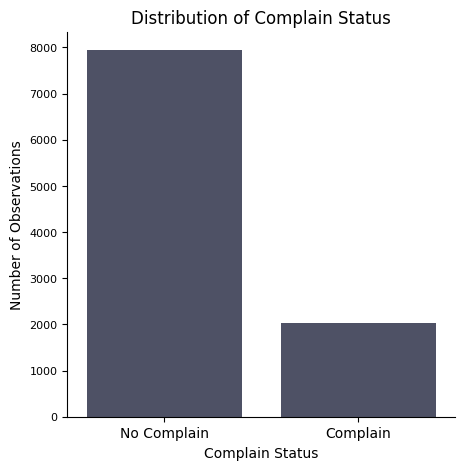

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(x='Complain', data=df, ax=ax, color=color[1])
ax.set_ylabel('Number of Observations')
ax.set_xlabel('Complain Status')
ax.set_title('Distribution of Complain Status')

ax.tick_params(axis="y", labelsize=8)
ax.set_xticklabels(['No Complain', 'Complain'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('Pics/compl_imbalance.png', bbox_inches='tight')



### Under-sampling

In [72]:
df.groupby('Complain').size()

Complain
0    7943
1    2037
dtype: int64

In [73]:
complain_0 = df[df['Complain'] == 0]
complain_1 = df[df['Complain'] == 1]

In [74]:
Count_Outcome_1 = complain_1.Complain.count()
Count_Outcome_1

2037

In [75]:
comlain_0_redused = complain_0.sample(Count_Outcome_1)
comlain_0_redused.shape

(2037, 16)

In [76]:
balanced_df = pd.concat([comlain_0_redused,complain_1],axis=0)
balanced_df.shape

(4074, 16)

In [77]:
balanced_df.groupby('Complain').size()

Complain
0    2037
1    2037
dtype: int64

Text(0.5, 1.0, 'Balanced dataset')

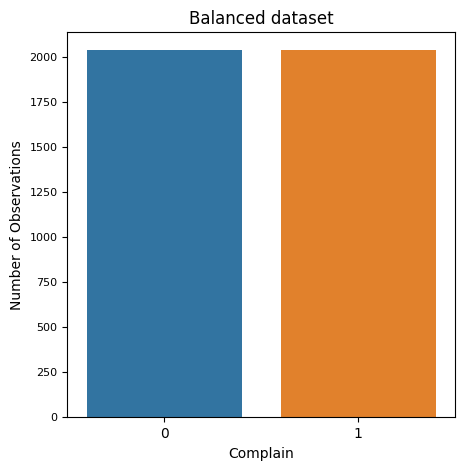

In [78]:
fig, ax = plt.subplots(figsize=(5,5))

sns.countplot(x='Complain', data=balanced_df, ax=ax)
ax.set_ylabel('Number of Observations')
ax.tick_params(axis="y", labelsize=8)
ax.set_title('Balanced dataset')

In [79]:
balanced_df.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
2306,15602034,697,France,Female,34,2,126558.92,1,1,0,73334.43,0,0,5,PLATINUM,809
3425,15802207,769,Germany,Male,43,4,110182.54,2,1,1,87537.32,0,0,2,PLATINUM,505
174,15625524,512,France,Male,40,5,0.00,2,1,1,146457.83,0,0,3,DIAMOND,435
9132,15611315,708,Germany,Female,23,4,71433.08,1,1,0,103697.57,0,0,2,SILVER,455
9328,15807239,664,France,Female,34,7,93920.47,1,0,0,179913.98,0,0,1,PLATINUM,503


### Create X and Y

In [80]:
X = balanced_df.drop('Complain', axis=1)
Y = balanced_df['Complain']

### Preprocess data

In [81]:
def preprocess(X):
    numeric_attributes = X.select_dtypes(include=np.number)
    categ_attributes = X.select_dtypes(exclude=np.number)


    preprocessor = ColumnTransformer(
    transformers=[
            ('num', MinMaxScaler(), numeric_attributes.columns.to_list()),
            ('cat', OneHotEncoder(), categ_attributes.columns.to_list())
        ],
        remainder='passthrough')
    
    X_preprocessed = preprocessor.fit_transform(X)
    transformer_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categ_attributes.columns.tolist())
    new_columns = numeric_attributes.columns.tolist() + transformer_columns.tolist()


    X_preprocessed = pd.DataFrame(X_preprocessed, columns=new_columns)
    
    return X_preprocessed


In [82]:
X_preprocessed = preprocess(X)

In [83]:



X_preprocessed.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,...,Point Earned,Location_France,Location_Germany,Location_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0.145338,0.694,0.242424,0.2,0.504424,0.000000,1.0,0.0,0.366689,0.0,...,0.759446,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.946066,0.838,0.378788,0.4,0.439153,0.333333,1.0,1.0,0.437718,0.0,...,0.376574,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.239303,0.324,0.333333,0.5,0.000000,0.333333,1.0,1.0,0.732381,0.0,...,0.288413,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.182464,0.716,0.075758,0.4,0.284710,0.000000,1.0,0.0,0.518536,0.0,...,0.313602,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.966195,0.628,0.242424,0.7,0.374337,0.000000,0.0,0.0,0.899696,0.0,...,0.374055,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Plot the feature importances

In [84]:
selector = ExtraTreesClassifier(n_estimators=50)
selector.fit(X_preprocessed, Y)

ExtraTreesClassifier(n_estimators=50)

In [85]:
importances = selector.feature_importances_
importances

array([0.0058132 , 0.00503441, 0.03814421, 0.00518929, 0.00990853,
       0.0372049 , 0.00242001, 0.01448636, 0.00540453, 0.8308696 ,
       0.00449439, 0.00518627, 0.00473268, 0.01755696, 0.00184524,
       0.00220054, 0.00344581, 0.00152071, 0.00145423, 0.00156012,
       0.00152799])

In [86]:
features_importances = sorted(zip(importances, X_preprocessed.columns.to_list()), reverse=True)
importances, feature_names = zip(*features_importances)

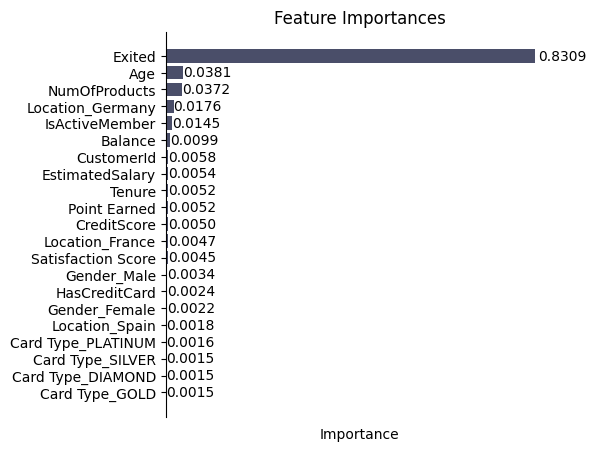

In [87]:
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.barh(feature_names, importances, color=color[1])
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')

ax.invert_yaxis()


ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)  
ax.spines['bottom'].set_visible(False)

ax.set_xticklabels([])
ax.set_xticks([])


for bar, imp in zip(bars, importances):
    plt.gca().annotate(f'{imp:.4f}',
                       xy=(bar.get_width() * 1.01, 
                           bar.get_y() + bar.get_height() / 2),
                       ha='left',
                       va='center')
    
plt.savefig('Pics/feature_importance.png', bbox_inches='tight')

plt.show()

In [88]:
features_importances

[(0.8308695966794157, 'Exited'),
 (0.038144214242123727, 'Age'),
 (0.03720490400633527, 'NumOfProducts'),
 (0.017556957704687896, 'Location_Germany'),
 (0.01448635694685493, 'IsActiveMember'),
 (0.009908529396462445, 'Balance'),
 (0.005813204086691387, 'CustomerId'),
 (0.005404530729954713, 'EstimatedSalary'),
 (0.005189285862629822, 'Tenure'),
 (0.0051862735347286215, 'Point Earned'),
 (0.005034410882480978, 'CreditScore'),
 (0.004732676690964764, 'Location_France'),
 (0.004494394498220809, 'Satisfaction Score'),
 (0.003445810247837315, 'Gender_Male'),
 (0.0024200111349753873, 'HasCreditCard'),
 (0.0022005444920279752, 'Gender_Female'),
 (0.0018452424529286705, 'Location_Spain'),
 (0.0015601196510164018, 'Card Type_PLATINUM'),
 (0.0015279943176448856, 'Card Type_SILVER'),
 (0.0015207084452358358, 'Card Type_DIAMOND'),
 (0.0014542339967823362, 'Card Type_GOLD')]

In [89]:
X_preprocessed

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,...,Point Earned,Location_France,Location_Germany,Location_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0.145338,0.694,0.242424,0.2,0.504424,0.000000,1.0,0.0,0.366689,0.0,...,0.759446,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.946066,0.838,0.378788,0.4,0.439153,0.333333,1.0,1.0,0.437718,0.0,...,0.376574,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.239303,0.324,0.333333,0.5,0.000000,0.333333,1.0,1.0,0.732381,0.0,...,0.288413,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.182464,0.716,0.075758,0.4,0.284710,0.000000,1.0,0.0,0.518536,0.0,...,0.313602,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.966195,0.628,0.242424,0.7,0.374337,0.000000,0.0,0.0,0.899696,0.0,...,0.374055,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,0.521919,0.504,0.257576,0.7,0.361112,0.333333,1.0,1.0,0.258472,0.0,...,0.702771,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4070,0.084856,0.618,0.272727,0.6,0.493593,0.333333,1.0,0.0,0.484206,0.0,...,0.842569,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4071,0.817068,0.494,0.530303,0.4,0.352259,0.000000,1.0,0.0,0.346936,1.0,...,0.205290,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4072,0.075327,0.718,0.272727,0.7,0.000000,0.000000,0.0,1.0,0.210413,1.0,...,0.450882,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [90]:
x_train, x_test, y_train, y_test = train_test_split(X_preprocessed, Y, test_size=0.20, random_state=1)

In [91]:
x_train

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,...,Point Earned,Location_France,Location_Germany,Location_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
3985,0.534880,0.536,0.424242,0.6,0.598704,0.000000,1.0,0.0,0.603408,1.0,...,0.943325,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
829,0.462312,0.752,0.575758,0.2,0.420385,0.000000,1.0,1.0,0.230213,0.0,...,0.681360,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
546,0.944034,0.172,0.378788,0.5,0.000000,0.333333,1.0,1.0,0.178416,0.0,...,0.442065,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1401,0.684094,0.504,0.196970,0.7,0.618864,0.000000,1.0,1.0,0.897357,0.0,...,0.793451,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2779,0.379233,0.770,0.424242,0.2,0.423857,0.000000,1.0,0.0,0.571916,1.0,...,0.102015,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,0.018353,0.694,0.378788,0.8,0.412156,0.000000,1.0,0.0,0.334477,1.0,...,0.487406,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1096,0.754597,0.494,0.636364,0.0,0.313035,0.000000,0.0,1.0,0.242506,0.0,...,0.730479,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3980,0.134046,0.714,0.333333,0.1,0.000000,0.333333,1.0,0.0,0.070408,1.0,...,0.020151,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
235,0.258659,0.174,0.318182,0.0,0.409415,0.000000,0.0,0.0,0.110924,0.0,...,0.617128,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Create model

In [92]:

LR_model = LogisticRegression().fit(x_train,y_train)

### Test model

In [93]:
y_pred = LR_model.predict(x_test)
Prediction_accuracy = accuracy_score(y_test, y_pred)
print('Prediction accuracy score:\t %0.2f'   % (Prediction_accuracy * 100))


Prediction accuracy score:	 99.63


In [94]:
Prediction_conf_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion matrix is :\n',Prediction_conf_matrix)


The confusion matrix is :
 [[400   0]
 [  3 412]]


### Create dataset with the best features

In [100]:
best_features_importances =[(i,j) for i,j in features_importances if i > 0.03 ]
best_features_importances

best_importances, best_feature_names = zip(*best_features_importances)
(best_importances, best_feature_names)

((0.8308695966794157, 0.038144214242123727, 0.03720490400633527),
 ('Exited', 'Age', 'NumOfProducts'))

### Plot best features

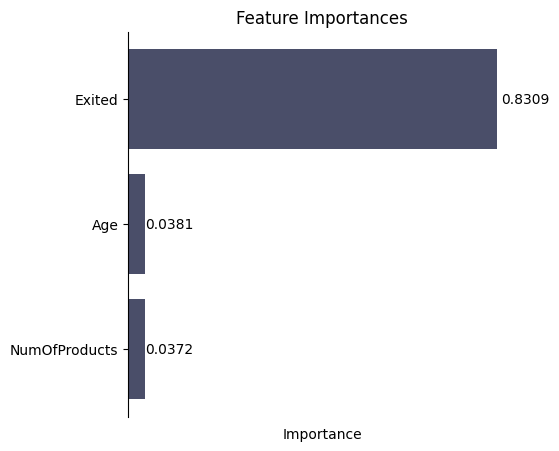

In [160]:
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.barh(best_feature_names, best_importances, color=color[1])
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')

ax.invert_yaxis()  # Reverse the order of the features

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)  
ax.spines['bottom'].set_visible(False)

ax.set_xticklabels([])
ax.set_xticks([])
# Add annotations
for bar, imp in zip(bars, importances):
    ax.annotate(f'{imp:.4f}',
                       xy=(bar.get_width() * 1.01, 
                           bar.get_y() + bar.get_height() / 2),
                       ha='left',
                       va='center')


plt.show()

In [102]:
best_df = X_preprocessed[list(best_feature_names)]
best_df

,Exited,Age,NumOfProducts
0,0.0,0.242424,0.000000
1,0.0,0.378788,0.333333
2,0.0,0.333333,0.333333
3,0.0,0.075758,0.000000
4,0.0,0.242424,0.000000
...,...,...,...
4069,0.0,0.257576,0.333333
4070,0.0,0.272727,0.333333
4071,1.0,0.530303,0.000000
4072,1.0,0.272727,0.000000


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(best_df, Y, test_size=0.20, random_state=1)

In [104]:
X_train

,Exited,Age,NumOfProducts
3985,1.0,0.424242,0.000000
829,0.0,0.575758,0.000000
546,0.0,0.378788,0.333333
1401,0.0,0.196970,0.000000
2779,1.0,0.424242,0.000000
...,...,...,...
3839,1.0,0.378788,0.000000
1096,0.0,0.636364,0.000000
3980,1.0,0.333333,0.333333
235,0.0,0.318182,0.000000


In [105]:
model_2 = LogisticRegression().fit(X_train,Y_train)

In [159]:
y_pred_2 = model_2.predict(X_test)
Prediction_accuracy = accuracy_score(Y_test, y_pred_2)
print('Prediction accuracy score:\t %0.2f'   % (Prediction_accuracy * 100))


Prediction accuracy score:	 99.63


In [107]:
Prediction_conf_matrix = confusion_matrix(Y_test, y_pred_2)
print('\nThe confusion matrix is :\n',Prediction_conf_matrix)


The confusion matrix is :
 [[400   0]
 [  3 412]]


# Predict

In [144]:
to_pred = pd.read_csv('data/New Sample.csv')

In [145]:
to_pred.head()

,CustomerId,CreditScore,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,15710408,584,Spain,Female,38,3,0.00,2,1,1,4525.40,0,2,GOLD,941
1,15598695,834,Germany,Female,68,9,130169.27,2,0,1,93112.20,0,5,GOLD,882
2,15649354,754,Spain,Male,35,4,0.00,2,1,1,9658.41,0,1,SILVER,474
3,15737556,590,France,Male,43,7,81076.80,2,1,1,182627.25,1,1,DIAMOND,253
4,15671610,740,France,Male,36,7,0.00,1,1,1,13177.40,0,5,SILVER,466


In [146]:
x_pred = preprocess(to_pred)
x_pred.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited,...,Point Earned,Location_France,Location_Germany,Location_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0.539483,0.293785,0.230769,0.333333,0.000000,0.333333,1.0,1.0,0.000000,0.0,...,0.931347,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,1.000000,1.000000,1.000000,0.917939,0.333333,0.0,1.0,0.455963,0.0,...,0.854922,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.244642,0.774011,0.153846,0.444444,0.000000,0.333333,1.0,1.0,0.026420,0.0,...,0.326425,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.670586,0.310734,0.358974,0.777778,0.571744,0.333333,1.0,1.0,0.916703,1.0,...,0.040155,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.352120,0.734463,0.179487,0.777778,0.000000,0.000000,1.0,1.0,0.044532,0.0,...,0.316062,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [147]:
y_pred_new = LR_model.predict(x_pred)

In [148]:
for num,pred in enumerate(y_pred_new):
    print(f'{num+1}: {pred}')

1: 0
2: 0
3: 0
4: 1
5: 0
6: 1
7: 0
8: 0
9: 1
10: 0
11: 0
12: 1
13: 1
14: 0
15: 1
16: 0
17: 0
18: 0
19: 0
20: 1


In [149]:
to_pred = x_pred[list(best_feature_names)]
to_pred

,Exited,Age,NumOfProducts
0,0.0,0.230769,0.333333
1,0.0,1.000000,0.333333
2,0.0,0.153846,0.333333
3,1.0,0.358974,0.333333
4,0.0,0.179487,0.000000
5,1.0,0.717949,0.000000
6,0.0,0.487179,0.000000
7,0.0,0.205128,0.333333
8,1.0,0.435897,0.666667
9,0.0,0.179487,0.000000


In [150]:
y_pred_new2 = model_2.predict(to_pred)

In [158]:
y_pred_new == y_pred_new2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [153]:
pr

1: 0 0
1: 0 0
1: 0 0
1: 1 1
1: 0 0
1: 1 1
1: 0 0
1: 0 0
1: 1 1
1: 0 0
1: 0 0
1: 1 1
1: 1 1
1: 0 0
1: 1 1
1: 0 0
1: 0 0
1: 0 0
1: 0 0
1: 1 1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(best_df, Y, test_size=0.2, random_state=10)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
model.predict[best_df.columns.to_list()]